In [10]:
def plot_loss(phase, all_losses):
    """
    all_losses must be an array
    """
    f, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlabel('Trials')
    ax.set_ylabel('Loss')
    ax.set_title(phase)
    for i in range(len(all_losses)):
        if all_losses[i] < 0.1:
            ax.text(i*0.9, all_losses[i]*1.4, s=(i, str(all_losses[i])[:4]))
            break
    ax.plot(all_losses)
    #ax.text(len(all_losses)*0.9, all_losses[-1]*1.2, s=str(all_losses[-1])[:5], alpha=0.9)

In [11]:
def plot_accuracy(phase, all_accus):
    """
    all_losses can be an array or a matrix
    """
    phases = ['Phase A', 'Phase B', 'Phase C']
    f, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlabel('Trials')
    ax.set_ylabel('Accuracy')
    ax.set_title(phase)
    ax.set_ylim([0, 1.1])
    ax.set_yticks(np.arange(0,1.1,0.2))
    ax.spines['top'].set_visible(False)  #去掉上边框
    ax.spines['right'].set_visible(False) #去掉右边框
    for j in range(all_accus.shape[-1]):
        all_accu = all_accus[:, j]
        for i in range(len(all_accu)):
            if all_accu[i] > 0.9:
                ax.text(i, all_accu[i], s=i)
                break
        ax.plot(all_accu, label=phases[j])
        ax.legend() #loc='upper right'

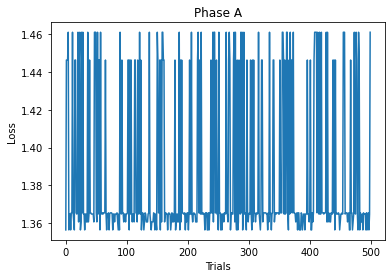

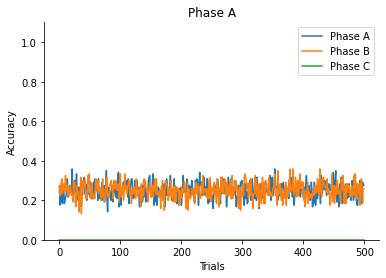

In [40]:
plot_loss('Phase A', all_lossesA)
plot_accuracy('Phase A', all_accuA)

55


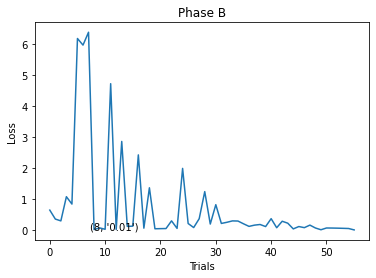

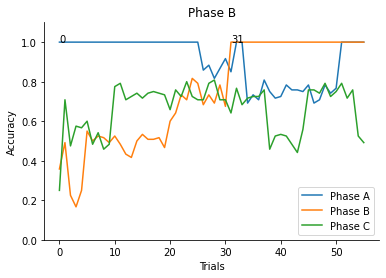

In [22]:
all_lossesB, all_accuB, T1_all_accuB, T2_all_accuB  = train_model('Phase B')
plot_loss('Phase B', all_lossesB)
plot_accuracy('Phase B', all_accuB)

9


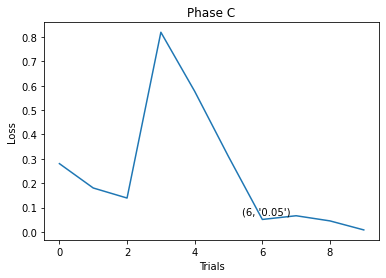

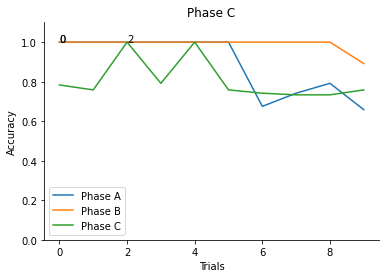

In [23]:
all_lossesC, all_accuC, Old_accu, New_accu = train_model('Phase C')
plot_loss('Phase C', all_lossesC)
plot_accuracy('Phase C', all_accuC)

### C0-C1 vs C2 in initital trained on A and transfer on B

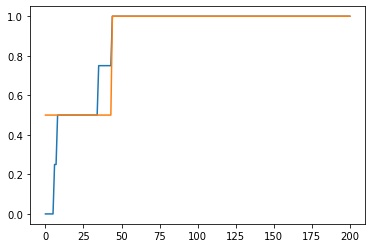

In [24]:
plt.plot(T1_all_accuA)
plt.plot(T2_all_accuA)

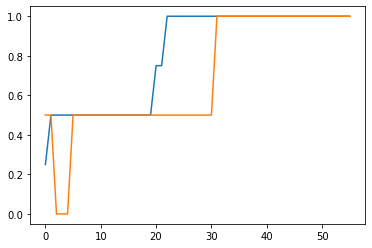

In [25]:
plt.plot(T1_all_accuB)
plt.plot(T2_all_accuB)

### Novel context

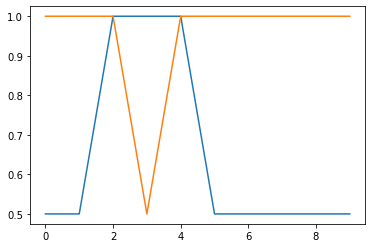

In [26]:
plt.plot(Old_accu)
plt.plot(New_accu)

### Learning curve

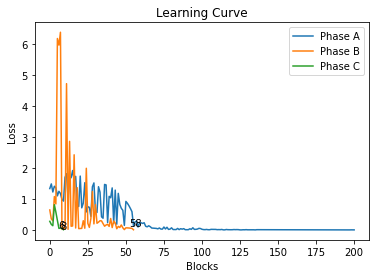

In [27]:
def plot_learningcurve(phases, all_losses):
    """
    all_losses can be an array or a matrix
    """
    f, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlabel('Blocks')
    ax.set_ylabel('Loss')
    ax.set_title("Learning Curve")
    for j in range(len(phases)):
        all_loss = all_losses[j]
        for i in range(len(all_loss)):
            if all_loss[i] < 0.1:
                ax.text(i*0.9, all_loss[i]*1.3, s=i)
                break
        ax.plot(all_loss, label=phases[j])
        ax.legend()
        
plot_learningcurve(['Phase A', 'Phase B', 'Phase C'], 
                   [all_lossesA, all_lossesB, all_lossesC])

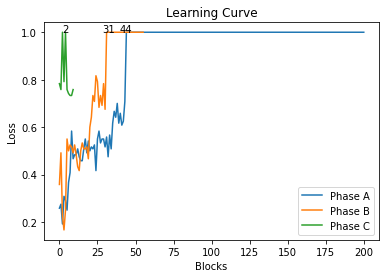

In [28]:
def plot_learning_accu_curve(phases, all_losses):
    """
    all_losses can be an array or a matrix
    """
    f, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlabel('Blocks')
    ax.set_ylabel('Loss')
    ax.set_title("Learning Curve")
    for j in range(len(phases)):
        all_loss = all_losses[j]
        for i in range(len(all_loss)):
            if all_loss[i] > 0.9:
                ax.text(i*0.9, all_loss[i], s=i)
                break
        ax.plot(all_loss, label=phases[j])
        ax.legend()
        
plot_learning_accu_curve(['Phase A', 'Phase B', 'Phase C'], 
                  [all_accuA[:, 0], all_accuB[:, 1], all_accuC[:, 2]])